In this project, we are going to look at 'bike_rental_hour.csv', a dataset that contains the hourly and daily count of rental bikes between years 2011 and 2012 in the Capital bikeshare system. From the dataset, we are going to apply various machine learning algorithms to generate a model that can predict the number of bike rentals.

For more information on this dataset click [here](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Data Analysis and Feature Engineering

---

(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

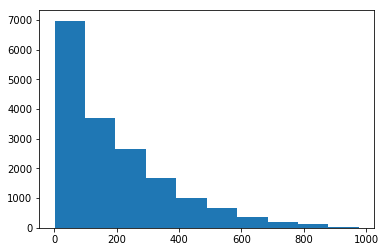

In [2]:
plt.hist(bike_rentals['cnt'])

In [3]:
bike_rentals['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

Using a histogram, we've quickly plotted the distribution of the 'cnt' column. This is the total number of bike rentals for a particular hour of a day. We can see that this is a right skewed distribution. The 50% percentile, or the median is 142. 

We can add a feature to the dataset. By splitting the day to four time brackets, we can create a new column, 'time_label'.

In [4]:
def assign_label(hour):
    if hour > 6 and hour <= 12:
        return 1
    elif hour > 12 and hour <= 18:
        return 2
    elif hour > 18 and hour <= 24:
        return 3
    else:
        return 4

In [5]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

Next, Let's take a look at the correlation of this dataset.

In [6]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.006533
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056,0.006467
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495,0.004770
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638,0.005782
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,-0.305052
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.000586
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002636
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,-0.000640
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426,-0.031821
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,-0.112537


In [7]:
correlations = bike_rentals.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.494422
Name: cnt, dtype: float64

We are not really seeing very strong correlations in these columns. The 'casual' and 'registered' columns are simply subcategories of the 'cnt' column. These columns leak information on the target column so we'll have to drop them. The 'dteday' column is just the date, and can't be used in this machine learning exercise.


In [8]:
columns = bike_rentals.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label'],
      dtype='object')

### Applying Machine Learning

---

In order to prepare for machine learning, we'll need to split the data into a training set and a testing set. We can use the math module to randomly sample 80% of the data and assign it to the training set. Then we can use the remaining 20% as the testing set.

We will use MSE for the evauation of this machine learning algorithm. MSE works well since the target column 'cnt' is continuous.

In [9]:
import math

#Sample 80% of the data randomly and assigns it to train.
eighty_percent_values = math.floor(bike_rentals.shape[0]*0.8)
train = bike_rentals.sample(n=eighty_percent_values, random_state = 1)

#Selects the remaining 20% to test.
test = bike_rentals.drop(train.index)

In [10]:
train.shape[0] + test.shape[0] == bike_rentals.shape[0]

True

Let's start by trying a simple linear regression model and checking the error of both the testing set and the training set.

In [11]:
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions_test = lr.predict(test[columns])
mse_test = mean_squared_error(test['cnt'], predictions_test)
mse_test

15848.500195099274

In [12]:
predictions_train = lr.predict(train[columns])
mse_train = mean_squared_error(train['cnt'], predictions_train)
mse_train

16262.308571201114

Both the training set and the test set showed high error.The linear regression model is probably not the best for this dataset. We can use the decision tree to see if we can improve our predictions. The linear regression method is great for datasets with lots of continuous data, but a lot of the columns in this dataset is not continuous, but rather categorical.

Let's start by using a single tree model.

In [13]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
mse

2734.3272105876699

As we can see, the decision tree model reduced our error signficantly. We can further improve our results if we use a forest of decision trees to reduce overfitting.

In [14]:
tree = RandomForestRegressor(min_samples_leaf=2, n_estimators=250)
tree.fit(train[columns], train['cnt'])
predictions = tree.predict(test[columns])

mse = mean_squared_error(test['cnt'], predictions)
mse

1851.3854653532792

We specified the hyperparameter values 'min_samples_leaf' and 'n_estimators', we can optimize these values by using a for loop.

In [15]:
mse_leaf=[]
for i in range(1, 10):
    tree = RandomForestRegressor(min_samples_leaf=i, n_estimators=250)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_leaf.append(mse)
mse_leaf

[1854.7577391990794,
 1839.0620577774473,
 1925.0742908051077,
 1969.0264103911857,
 2049.1460500826547,
 2074.0831040747389,
 2132.6560175009272,
 2189.186577585444,
 2285.3912359439528]

In [16]:
n_trees = [250, 500, 750]
mse_trees=[]
for i in n_trees:
    tree = RandomForestRegressor(min_samples_leaf=1, n_estimators=i)
    tree.fit(train[columns], train['cnt'])
    predictions = tree.predict(test[columns])

    mse = mean_squared_error(test['cnt'], predictions)
    mse_trees.append(mse)
mse_trees

[1823.6687851507481, 1828.0975978550055, 1812.9346447554024]

Using 750 trees and 1 min_samples_leaf, we managed to slightly lower the MSE down to 1812. The random forest regressor is a powerful tool. However, using a large amount of trees in conjunction with a for loop takes a very long time to process.

---

#### Learning Summary

Concepts explored:: pandas, matplotlib, features engineering, linear regression, decision trees, random forests, MSE

Functions, methods, and properties used:.hist(), .apply(), .corr(), .columns, .drop(), .sample(), .index, .floor(),.fit() .predict(), .mean_squared_error(), .append()

The files used for this project can be found in my [GitHub repository](https://github.com/sengkchu/Dataquest-Guided-Projects-Solutions/tree/master/Guided%20Project_%20Predicting%20Bike%20Rentals).


